# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [0]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [0]:
url_dfno = 'https://raw.githubusercontent.com/eolson615/SpringboardDSCareerTrack/master/Capstone_Project_1/Data/step3_output.csv'

dfno = pd.read_csv(url_dfno, index_col=[0])
dfno.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.0,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,0.0,1
10,Donner Ski Ranch,California,8012,750,0,0.0,0,0,0,1,5,2,8,52.0,2.0,1.5,505.0,60.000000,163.000000,82.0,400.0,75.000000,75.00000,170.0,0.0,1
12,June Mountain,California,10090,2590,0,0.0,0,2,0,0,4,1,7,41.0,2.0,2.0,1500.0,174.873239,115.103943,58.0,250.0,57.916957,64.16681,128.0,0.0,1


In [0]:
url_dfoutliers = 'https://raw.githubusercontent.com/eolson615/SpringboardDSCareerTrack/bd34fe57380db7425da3b07e930f249a5b6fdc22/Capstone_Project_1/Data/alternate_step3_output.csv'

dfoutliers = pd.read_csv(url_dfoutliers, index_col=[0])
dfoutliers.head()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [0]:
dfno_dummies = dfno['state']
dfno = pd.concat([dfno.drop('state', axis=1), pd.get_dummies(dfno_dummies)], axis=1)
dfno.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.00000,152.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.00000,104.0,80.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Donner Ski Ranch,8012,750,0,0.0,0,0,0,1,5,2,8,52.0,2.0,1.5,505.0,60.000000,163.000000,82.0,400.0,75.000000,75.00000,170.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,June Mountain,10090,2590,0,0.0,0,2,0,0,4,1,7,41.0,2.0,2.0,1500.0,174.873239,115.103943,58.0,250.0,57.916957,64.16681,128.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [0]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
# X = dfno.drop(['Name','AdultWeekend'], axis=1)

# # Declare a response variable, called y, and assign it the AdultWeekend column of the df 
# y = dfno.AdultWeekend

# # Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
# scaler = preprocessing.StandardScaler().fit(X)

# # Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
# X_scaled=scaler.transform(X) 

# X_scaled

In [0]:
y

array([34.        , 78.        , 47.        , 75.        , 64.16681004,
       59.        , 84.        , 83.        , 50.        , 69.        ,
       89.        , 71.        , 56.        , 84.        , 65.        ,
       65.        , 60.        , 55.        , 62.        , 42.        ,
       42.        , 47.        , 32.        , 47.        , 64.16681004,
       43.        , 55.        , 35.        , 40.        , 45.        ,
       52.        , 39.        , 40.        , 46.        , 43.        ,
       55.        , 49.        , 32.        , 75.        , 79.        ,
       68.        , 45.        , 40.        , 64.16681004, 47.        ,
       35.        , 65.        , 49.        , 49.        , 64.16681004,
       49.        , 34.        , 45.        , 45.        , 45.        ,
       35.        , 42.        , 45.        , 64.16681004, 45.        ,
       47.        , 44.        , 37.        , 58.        , 35.34      ,
       48.        , 59.        , 49.        , 47.        , 39.  

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [0]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
# y = y.ravel()

# # Call the train_test_split() function with the first two parameters set to X_scaled and y 
# # Declare four variables, X_train, X_test, y_train and y_test separated by commas 
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [0]:
print(y_test)

[47.         49.         68.         59.         59.         71.
 58.         55.         54.         65.         62.         48.
 42.         42.         44.         65.         39.         69.
 79.         64.16681004 55.         45.         79.         64.16681004
 64.         45.         59.         47.         75.         60.
 39.         45.         68.         64.16681004 57.         40.
 72.         34.         35.         92.         59.         46.        ]


Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [0]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
# lm = linear_model.LinearRegression()
# model = lm.fit(X_train,y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [0]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
#y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
#rmse_model1 = sqrt(mean_squared_error(y_test, y_pred))
#rmse_model1

## Review Model Outcomes — Iterate over additional models as needed

In [0]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

explained_variance_score(y_test, y_pred)

-4.4249374835893435e+22

In [0]:
mean_absolute_error(y_test, y_pred)

763211860922.933

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [0]:
model.intercept_

191945498011.62872

In [0]:
model.coef_

array([ 2.06790706e+00,  5.65122188e-01,  7.16709598e+12,  4.52183840e+13,
       -7.71226070e+12,  7.24037872e+11,  9.10478979e+11,  1.50571857e+12,
        1.76434841e+12,  1.82317665e+12, -3.19143012e+12,  2.12159530e+00,
        3.12136838e-01, -7.53799584e-01, -4.43116148e-01,  8.80771043e-03,
        4.44911892e-01, -4.76366852e-01,  1.75079307e-01,  1.02466134e+01,
       -3.32679584e-01,  1.26515710e+00,  1.09267914e+00, -8.24354802e+11,
       -8.24354802e+11, -2.28193718e+12, -1.82096936e+12, -1.82096936e+12,
       -1.98860575e+12, -1.41919698e+12, -1.16229695e+12, -1.41919698e+12,
       -1.82096936e+12, -1.96127842e+07, -1.63374370e+12, -3.05511492e+12,
       -2.28193718e+12, -1.16229695e+12, -1.41919698e+12, -8.24354802e+11,
       -2.65044484e+12, -4.68854240e+04, -1.98860575e+12, -3.39287443e+12,
       -1.41919698e+12, -1.63374370e+12, -1.41919698e+12, -2.53518674e+12,
        7.89398193e-01, -8.24354802e+11, -8.24354802e+11, -1.41919698e+12,
       -2.14125869e+12, -

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [0]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
# pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0. |  |-|
| Model 2. | 0.| |'state'|
| Model 3. | 0. | |'state','summit_elev','base_elev'|

Model Selection:

# I am trying a different way!
#Model 1: with all of the features

In [0]:
dfoutliers.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

In [0]:
x = dfoutliers[['summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'projectedDaysOpen','NightSkiing_ac']]
y = dfoutliers['AdultWeekday']

In [0]:
scaler2 = preprocessing.StandardScaler()

In [0]:
scaler2.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
x_scaled = scaler2.transform(x)
x_scaled

array([[-0.16898816,  1.36939248, -1.00315496, ...,  3.64446125,
         1.05559405,  5.27700671],
       [-0.53057645,  0.35051616, -0.69599852, ...,  1.24409672,
        -1.04632838, -0.61088277],
       [-0.66829865, -0.97190039, -0.50329826, ..., -0.87033096,
         1.12565814, -0.28972516],
       ...,
       [ 0.87581029,  0.38341738,  0.93257728, ...,  0.86786404,
         0.10972896,  0.56669513],
       [ 1.37674105, -0.23321506,  1.76060639, ...,  0.49163136,
         0.00648966, -0.61088277],
       [ 1.33272395, -0.11646881,  1.631924  , ..., -0.26083401,
         0.00648966, -0.61088277]])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=1)
x_train

array([[-0.87218152, -0.75326651, -0.81401126, ..., -0.63706669,
        -0.34568757, -0.18267263],
       [ 1.62113045,  2.60902533,  1.14694015, ...,  1.13875157,
         0.88043385, -0.28972516],
       [-0.81952304, -0.91246594, -0.70246497, ..., -0.93805284,
         0.53011345,  2.06543063],
       ...,
       [-0.94671354, -0.77979975, -0.89516522, ..., -1.05092264,
         0.00648966, -0.02209382],
       [ 0.57201131,  0.37492674,  0.57142597, ...,  1.84606902,
        -0.69600797, -0.61088277],
       [ 1.9948707 , -0.05066639,  2.40466495, ...,  1.24409672,
         0.56514549, -0.61088277]])

In [0]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.intercept_

57.77923175611107

In [0]:
coef_df = pd.DataFrame(abs(reg.coef_), x.columns, columns=['coefficient'])
coef_df.sort_values('coefficient', ascending=False)

,coefficient
summit_elev,3.973152e+01
base_elev,3.365230e+01
Snow Making_ac,6.630217e+00
Runs,4.810715e+00
fastQuads,3.836999e+00
fastSixes,3.803484e+00
SkiableTerrain_ac,3.613704e+00
triple,2.902568e+00
trams,2.787768e+00
daysOpenLastYear,2.619344e+00


In [0]:
ypred = reg.predict(x_test)
ypred

array([ 52.15297061,  63.34515032,  94.80790883,  58.09212979,
        38.62826642,  78.1940269 ,  70.96389458,  64.72088229,
        42.66179456,  67.3929097 ,  70.71896986,  43.27791992,
        41.67677835,  82.16904544,  53.63673086,  46.66710952,
        41.30693633,  62.98768667,  67.16987101,  71.25820378,
        51.45887582,  45.41366601,  43.88200278,  43.44060878,
        97.56798158,  53.56173436, 152.42803788,  38.66292796,
        48.27038027,  52.42420804,  58.32861911,  60.079179  ,
        40.02559686,  50.88090282,  42.43634618,  39.27490798,
        49.54916133,  36.1483381 ,  51.51628736,  40.99377587,
       101.01069287,  68.38843916, 130.05371289,  67.23703801,
        56.85831477,  49.72603658,  71.11910364,  47.47048648,
        31.61096725,  48.67439967, 107.46586289,  56.68335414,
        42.49535343,  57.46469702,  36.12312462,  86.36388235,
        54.5029188 ,  30.03764153,  51.79984086,  44.08998707,
        55.19454737,  55.09297217,  53.4964094 ,  43.51

In [0]:
explained_variance_score(y_test, ypred)

0.2697315250920421

##this is a low variance score. 

In [0]:
from sklearn.metrics import r2_score
r2score_rd1 = r2_score(y_test, ypred)
r2score_rd1

0.26961286261955497

#Model 2: Using OLS information to feature select by eleminating those features with the highest P value

In [0]:
import statsmodels.api as sm
x_scaled_with1s = sm.add_constant(x_scaled)
sm_model = sm.OLS(y, x_scaled_with1s)
sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     15.60
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           5.64e-37
Time:                        08:39:02   Log-Likelihood:                -1391.2
No. Observations:                 329   AIC:                             2826.
Df Residuals:                     307   BIC:                             2910.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.948     61.049      0.000      55.988      59.718
x1             7.9029     21.983      0.359      0.719     -35.354      51.160
x2             4.6720      5.803      0.805      0.421      -6.746      16.090
x3            -6.1300     18.463     -0.332      0.740     -42.459      30.199
x4            -1.4036      1.570     -0.894      0.372      -4.494       1.687
x5            -3.1154      1.113     -2.799      0.005      -5.305      -0.925
x6            -1.5251      1.261     -1.209      0.227      -4.007       0.956
x7             4.8282      1.559      3.097      0.002       1.760       7.896
x8             2.6268      1.062      2.475      0.014       0.538       4.716
x9             2.3102      1.031      2.240      0.026       0.281       4.339
x10            0.7117      0.971      0.733      0.464      -1.198       2.621
x11           -3.3203      1.118     -2.971      0.003      -5.520      -1.121
x12            1.7820      0.686      2.599      0.010       0.433       3.131
x13            7.5300      2.680      2.810      0.005       2.257      12.803
x14           -0.7552      1.188     -0.636      0.525      -3.093       1.583
x15            1.1201      1.604      0.698      0.485      -2.036       4.276
x16           -5.2737      2.017     -2.615      0.009      -9.242      -1.305
x17           -0.6305      1.284     -0.491      0.624      -3.157       1.896
x18            2.9836      1.700      1.755      0.080      -0.361       6.328
x19            0.0611      1.021      0.060      0.952      -1.948       2.070
x20            1.7551      1.587      1.106      0.270      -1.367       4.877
x21           -0.6393      1.719     -0.372      0.710      -4.023       2.744
x22           -0.2623      1.086     -0.241      0.809      -2.400       1.875
==============================================================================
Omnibus:                       39.904   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.988
Skew:                           0.541   Prob(JB):                     4.81e-25
Kurtosis:                       5.646   Cond. No.                     1.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Model 2 My way:

In [0]:
x_sansyearsOpen = x.drop('yearsOpen', axis=1)
scaler2.fit(x_sansyearsOpen)
x_sansyearsOpen = scaler2.transform(x_sansyearsOpen)
x_sansyearsOpen = sm.add_constant(x_sansyearsOpen)
sm_modelrd2 = sm.OLS(y, x_sansyearsOpen)
sm_resultsrd2 = sm_modelrd2.fit()
sm_resultsrd2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     16.43
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.37e-37
Time:                        09:20:54   Log-Likelihood:                -1391.2
No. Observations:                 329   AIC:                             2824.
Df Residuals:                     308   BIC:                             2904.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.946     61.148      0.000      55.991      59.715
x1             7.7687     21.833      0.356      0.722     -35.193      50.730
x2             4.7022      5.771      0.815      0.416      -6.654      16.059
x3            -6.0112     18.326     -0.328      0.743     -42.071      30.049
x4            -1.4053      1.568     -0.896      0.371      -4.490       1.679
x5            -3.1227      1.105     -2.827      0.005      -5.296      -0.949
x6            -1.5258      1.259     -1.212      0.226      -4.003       0.951
x7             4.8213      1.552      3.106      0.002       1.767       7.876
x8             2.6275      1.060      2.479      0.014       0.542       4.713
x9             2.3129      1.029      2.249      0.025       0.289       4.337
x10            0.7179      0.963      0.745      0.457      -1.178       2.613
x11           -3.3228      1.115     -2.980      0.003      -5.517      -1.128
x12            1.7811      0.684      2.602      0.010       0.434       3.128
x13            7.5480      2.659      2.839      0.005       2.317      12.779
x14           -0.7481      1.180     -0.634      0.527      -3.071       1.574
x15            1.1258      1.598      0.704      0.482      -2.019       4.271
x16           -5.2907      1.994     -2.654      0.008      -9.213      -1.368
x17           -0.6310      1.282     -0.492      0.623      -3.154       1.891
x18            2.9858      1.697      1.760      0.079      -0.353       6.324
x19            1.7644      1.577      1.119      0.264      -1.338       4.867
x20           -0.6399      1.717     -0.373      0.710      -4.017       2.738
x21           -0.2558      1.079     -0.237      0.813      -2.379       1.868
==============================================================================
Omnibus:                       39.797   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.461
Skew:                           0.540   Prob(JB):                     6.26e-25
Kurtosis:                       5.639   Cond. No.                     2.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sansNightSkiing = x.drop(['yearsOpen', 'NightSkiing_ac'], axis=1)
scaler2.fit(x_sansNightSkiing)
x_sansNightSkiing = scaler2.transform(x_sansNightSkiing)
x_sansNightSkiing = sm.add_constant(x_sansNightSkiing)
sm_modelrd3 = sm.OLS(y, x_sansNightSkiing)
sm_resultsrd3 = sm_modelrd3.fit()
sm_resultsrd3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     17.34
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.32e-38
Time:                        09:28:54   Log-Likelihood:                -1391.2
No. Observations:                 329   AIC:                             2822.
Df Residuals:                     309   BIC:                             2898.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.945     61.242      0.000      55.994      59.712
x1             7.1820     21.659      0.332      0.740     -35.437      49.801
x2             4.8501      5.729      0.847      0.398      -6.422      16.122
x3            -5.4440     18.141     -0.300      0.764     -41.140      30.252
x4            -1.3525      1.549     -0.873      0.383      -4.401       1.696
x5            -3.1070      1.101     -2.822      0.005      -5.273      -0.941
x6            -1.4972      1.251     -1.197      0.232      -3.959       0.965
x7             4.8263      1.550      3.114      0.002       1.777       7.876
x8             2.5838      1.042      2.480      0.014       0.533       4.634
x9             2.2813      1.018      2.240      0.026       0.278       4.285
x10            0.6756      0.945      0.715      0.475      -1.184       2.536
x11           -3.3258      1.113     -2.987      0.003      -5.517      -1.135
x12            1.7584      0.677      2.599      0.010       0.427       3.090
x13            7.6131      2.640      2.883      0.004       2.418      12.808
x14           -0.7609      1.177     -0.646      0.519      -3.077       1.556
x15            1.1668      1.586      0.735      0.463      -1.955       4.289
x16           -5.4091      1.927     -2.807      0.005      -9.201      -1.617
x17           -0.6423      1.279     -0.502      0.616      -3.159       1.875
x18            2.9621      1.691      1.751      0.081      -0.366       6.290
x19            1.7277      1.567      1.103      0.271      -1.355       4.810
x20           -0.6264      1.713     -0.366      0.715      -3.997       2.744
==============================================================================
Omnibus:                       40.100   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.350
Skew:                           0.544   Prob(JB):                     4.01e-25
Kurtosis:                       5.648   Cond. No.                     1.31e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sansbaseelev = x.drop(['base_elev', 'yearsOpen', 'NightSkiing_ac'], axis=1)
scaler2.fit(x_sansbaseelev)
x_sansbaseelev = scaler2.transform(x_sansbaseelev)
x_sansbaseelev = sm.add_constant(x_sansbaseelev)
sm_modelrd4 = sm.OLS(y, x_sansbaseelev)
sm_resultsrd4 = sm_modelrd4.fit()
sm_resultsrd4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     18.35
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           7.95e-39
Time:                        09:42:04   Log-Likelihood:                -1391.3
No. Observations:                 329   AIC:                             2821.
Df Residuals:                     310   BIC:                             2893.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.943     61.332      0.000      55.997      59.709
x1             0.6995      1.578      0.443      0.658      -2.406       3.805
x2             6.4261      2.285      2.812      0.005       1.930      10.922
x3            -1.3085      1.540     -0.850      0.396      -4.339       1.722
x4            -3.1703      1.079     -2.938      0.004      -5.293      -1.047
x5            -1.5198      1.247     -1.219      0.224      -3.974       0.934
x6             4.8208      1.547      3.115      0.002       1.776       7.866
x7             2.5992      1.039      2.501      0.013       0.554       4.644
x8             2.2673      1.016      2.232      0.026       0.269       4.266
x9             0.6650      0.943      0.705      0.481      -1.191       2.521
x10           -3.3295      1.112     -2.995      0.003      -5.517      -1.142
x11            1.7524      0.675      2.595      0.010       0.423       3.081
x12            7.7156      2.614      2.951      0.003       2.572      12.860
x13           -0.7688      1.175     -0.654      0.513      -3.081       1.544
x14            1.1443      1.582      0.723      0.470      -1.969       4.258
x15           -5.4528      1.919     -2.842      0.005      -9.228      -1.677
x16           -0.6753      1.272     -0.531      0.596      -3.179       1.829
x17            2.9557      1.689      1.750      0.081      -0.367       6.278
x18            1.7444      1.563      1.116      0.265      -1.331       4.820
x19           -0.6576      1.707     -0.385      0.700      -4.017       2.702
==============================================================================
Omnibus:                       39.138   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.377
Skew:                           0.530   Prob(JB):                     1.77e-24
Kurtosis:                       5.618   Cond. No.                     9.11e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sansprojecteddaysopen = dfoutliers[['summit_elev', 'vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sansprojecteddaysopen)
x_sansprojecteddaysopen = scaler2.transform(x_sansprojecteddaysopen)
x_sansprojecteddaysopen = sm.add_constant(x_sansprojecteddaysopen)
sm_modelrd5 = sm.OLS(y, x_sansprojecteddaysopen)
sm_resultsrd5 = sm_modelrd5.fit()
sm_resultsrd5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     19.48
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.90e-39
Time:                        09:48:57   Log-Likelihood:                -1391.4
No. Observations:                 329   AIC:                             2819.
Df Residuals:                     311   BIC:                             2887.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.942     61.416      0.000      55.999      59.706
x1             0.7558      1.569      0.482      0.630      -2.332       3.843
x2             6.3319      2.269      2.791      0.006       1.868      10.796
x3            -1.1775      1.500     -0.785      0.433      -4.129       1.774
x4            -3.1495      1.076     -2.927      0.004      -5.267      -1.032
x5            -1.5281      1.245     -1.227      0.221      -3.978       0.922
x6             4.8258      1.545      3.123      0.002       1.785       7.866
x7             2.5664      1.034      2.481      0.014       0.531       4.602
x8             2.2613      1.014      2.230      0.026       0.266       4.257
x9             0.6572      0.942      0.698      0.486      -1.196       2.510
x10           -3.3475      1.109     -3.018      0.003      -5.530      -1.165
x11            1.7483      0.674      2.592      0.010       0.421       3.075
x12            7.6698      2.608      2.941      0.004       2.538      12.801
x13           -0.7883      1.173     -0.672      0.502      -3.095       1.519
x14            1.1414      1.580      0.722      0.471      -1.968       4.251
x15           -5.3937      1.910     -2.824      0.005      -9.152      -1.636
x16           -0.6959      1.270     -0.548      0.584      -3.194       1.802
x17            2.4944      1.189      2.099      0.037       0.156       4.833
x18            1.6094      1.521      1.058      0.291      -1.384       4.603
==============================================================================
Omnibus:                       38.992   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.446
Skew:                           0.526   Prob(JB):                     1.71e-24
Kurtosis:                       5.622   Cond. No.                     1.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sanssummitelev = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sanssummitelev)
x_sanssummitelev = scaler2.transform(x_sanssummitelev)
x_sanssummitelev = sm.add_constant(x_sanssummitelev)
sm_modelrd6 = sm.OLS(y, x_sanssummitelev)
sm_resultsrd6 = sm_modelrd6.fit()
sm_resultsrd6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     20.73
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           4.57e-40
Time:                        09:54:21   Log-Likelihood:                -1391.5
No. Observations:                 329   AIC:                             2817.
Df Residuals:                     312   BIC:                             2882.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.941     61.492      0.000      56.002      59.704
x1             6.7034      2.131      3.145      0.002       2.510      10.897
x2            -1.2615      1.488     -0.848      0.397      -4.190       1.667
x3            -3.1854      1.072     -2.971      0.003      -5.295      -1.076
x4            -1.4968      1.242     -1.205      0.229      -3.941       0.947
x5             4.7856      1.541      3.105      0.002       1.753       7.818
x6             2.4821      1.018      2.438      0.015       0.479       4.486
x7             2.2881      1.011      2.262      0.024       0.298       4.278
x8             0.6380      0.940      0.679      0.498      -1.211       2.487
x9            -3.3617      1.107     -3.036      0.003      -5.541      -1.183
x10            1.7053      0.668      2.554      0.011       0.392       3.019
x11            7.7743      2.596      2.995      0.003       2.667      12.882
x12           -0.8131      1.170     -0.695      0.488      -3.115       1.489
x13            1.1338      1.578      0.718      0.473      -1.971       4.239
x14           -5.3312      1.903     -2.801      0.005      -9.076      -1.586
x15           -0.6658      1.267     -0.526      0.599      -3.158       1.826
x16            2.5051      1.187      2.111      0.036       0.170       4.841
x17            1.8401      1.442      1.276      0.203      -0.998       4.678
==============================================================================
Omnibus:                       40.335   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.608
Skew:                           0.540   Prob(JB):                     7.87e-26
Kurtosis:                       5.696   Cond. No.                     8.47e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sanssnowmaking = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sanssnowmaking)
x_sanssnowmaking = scaler2.transform(x_sanssnowmaking)
x_sanssnowmaking = sm.add_constant(x_sanssnowmaking)
sm_modelrd7 = sm.OLS(y, x_sanssnowmaking)
sm_resultsrd7 = sm_modelrd7.fit()
sm_resultsrd7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     22.15
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.08e-40
Time:                        10:18:26   Log-Likelihood:                -1391.6
No. Observations:                 329   AIC:                             2815.
Df Residuals:                     313   BIC:                             2876.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.940     61.563      0.000      56.004      59.702
x1             6.6497      2.126      3.127      0.002       2.466      10.833
x2            -1.4124      1.458     -0.968      0.334      -4.282       1.457
x3            -3.1536      1.069     -2.949      0.003      -5.257      -1.050
x4            -1.5726      1.232     -1.276      0.203      -3.997       0.852
x5             4.6899      1.529      3.068      0.002       1.682       7.697
x6             2.4275      1.012      2.399      0.017       0.437       4.418
x7             2.2324      1.005      2.222      0.027       0.256       4.209
x8             0.6131      0.937      0.654      0.514      -1.231       2.457
x9            -3.3833      1.105     -3.061      0.002      -5.558      -1.208
x10            1.6027      0.638      2.513      0.012       0.348       2.857
x11            8.1189      2.509      3.236      0.001       3.183      13.055
x12           -0.8434      1.167     -0.723      0.470      -3.140       1.453
x13            0.9556      1.540      0.621      0.535      -2.074       3.985
x14           -5.4793      1.880     -2.914      0.004      -9.178      -1.780
x15            2.4654      1.183      2.084      0.038       0.137       4.793
x16            1.8510      1.440      1.285      0.200      -0.983       4.685
==============================================================================
Omnibus:                       40.952   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.537
Skew:                           0.558   Prob(JB):                     1.34e-25
Kurtosis:                       5.667   Cond. No.                     9.91e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sanslongestrun = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sanslongestrun)
x_sanslongestrun = scaler2.transform(x_sanslongestrun)
x_sanslongestrun = sm.add_constant(x_sanslongestrun)
sm_modelrd8 = sm.OLS(y, x_sanslongestrun)
sm_resultsrd8 = sm_modelrd8.fit()
sm_resultsrd8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     23.75
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           2.62e-41
Time:                        10:20:37   Log-Likelihood:                -1391.8
No. Observations:                 329   AIC:                             2814.
Df Residuals:                     314   BIC:                             2871.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.939     61.623      0.000      56.006      59.700
x1             7.1950      1.934      3.719      0.000       3.389      11.001
x2            -1.3000      1.446     -0.899      0.369      -4.145       1.545
x3            -3.1166      1.067     -2.922      0.004      -5.215      -1.018
x4            -1.5802      1.231     -1.284      0.200      -4.002       0.842
x5             4.6540      1.526      3.050      0.002       1.652       7.656
x6             2.4514      1.010      2.427      0.016       0.464       4.439
x7             2.2354      1.004      2.227      0.027       0.261       4.210
x8             0.6071      0.936      0.648      0.517      -1.235       2.450
x9            -3.3768      1.104     -3.058      0.002      -5.549      -1.204
x10            1.6062      0.637      2.521      0.012       0.353       2.860
x11            8.3722      2.473      3.386      0.001       3.507      13.238
x12           -0.8318      1.166     -0.713      0.476      -3.126       1.462
x13           -5.5442      1.875     -2.956      0.003      -9.234      -1.854
x14            2.4292      1.181      2.058      0.040       0.106       4.752
x15            1.8396      1.439      1.279      0.202      -0.991       4.671
==============================================================================
Omnibus:                       39.802   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.519
Skew:                           0.543   Prob(JB):                     1.00e-24
Kurtosis:                       5.624   Cond. No.                     9.22e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
x_sansdouble = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sansdouble)
x_sansdouble = scaler2.transform(x_sansdouble)
x_sansdouble = sm.add_constant(x_sansdouble)
sm_modelrd9 = sm.OLS(y, x_sansdouble)
sm_resultsrd9 = sm_modelrd9.fit()
sm_resultsrd9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     23.75
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           2.62e-41
Time:                        10:22:52   Log-Likelihood:                -1391.8
No. Observations:                 329   AIC:                             2814.
Df Residuals:                     314   BIC:                             2871.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.939     61.623      0.000      56.006      59.700
x1             7.1950      1.934      3.719      0.000       3.389      11.001
x2            -1.4874      1.454     -1.023      0.307      -4.349       1.374
x3            -3.1350      1.067     -2.939      0.004      -5.234      -1.036
x4            -1.7982      1.283     -1.402      0.162      -4.322       0.725
x5             3.9186      1.929      2.032      0.043       0.124       7.713
x6             2.0127      1.137      1.770      0.078      -0.225       4.250
x7             1.6943      1.287      1.316      0.189      -0.838       4.227
x8            -4.0643      1.645     -2.470      0.014      -7.301      -0.827
x9             3.5419      3.298      1.074      0.284      -2.948      10.031
x10            8.3722      2.473      3.386      0.001       3.507      13.238
x11           -0.8318      1.166     -0.713      0.476      -3.126       1.462
x12           -5.5442      1.875     -2.956      0.003      -9.234      -1.854
x13            2.4292      1.181      2.058      0.040       0.106       4.752
x14            1.8396      1.439      1.279      0.202      -0.991       4.671
==============================================================================
Omnibus:                       39.802   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.519
Skew:                           0.543   Prob(JB):                     1.00e-24
Kurtosis:                       5.624   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
x_sansterrainparks = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'total_chairs', 'Runs',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sansterrainparks)
x_sansterrainparks = scaler2.transform(x_sansterrainparks)
x_sansterrainparks = sm.add_constant(x_sansterrainparks)
sm_modelrd10 = sm.OLS(y, x_sansterrainparks)
sm_resultsrd10 = sm_modelrd10.fit()
sm_resultsrd10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     25.58
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           6.47e-42
Time:                        10:25:20   Log-Likelihood:                -1392.1
No. Observations:                 329   AIC:                             2812.
Df Residuals:                     315   BIC:                             2865.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.938     61.671      0.000      56.007      59.699
x1             7.1147      1.930      3.687      0.000       3.318      10.911
x2            -1.3912      1.447     -0.961      0.337      -4.238       1.456
x3            -3.1483      1.066     -2.954      0.003      -5.245      -1.052
x4            -1.8501      1.279     -1.446      0.149      -4.368       0.667
x5             3.8481      1.925      1.999      0.046       0.061       7.635
x6             1.9751      1.135      1.740      0.083      -0.258       4.209
x7             1.6354      1.284      1.274      0.204      -0.890       4.161
x8            -4.0172      1.643     -2.446      0.015      -7.249      -0.785
x9             3.0920      3.235      0.956      0.340      -3.273       9.457
x10            8.3203      2.470      3.369      0.001       3.461      13.180
x11           -5.3691      1.858     -2.890      0.004      -9.024      -1.714
x12            2.4102      1.179      2.044      0.042       0.090       4.731
x13            1.8400      1.438      1.280      0.202      -0.989       4.669
==============================================================================
Omnibus:                       38.873   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.717
Skew:                           0.532   Prob(JB):                     6.71e-24
Kurtosis:                       5.579   Cond. No.                         9.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
x_sanstotalchairs = dfoutliers[['vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'Runs',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sanstotalchairs)
x_sanstotalchairs = scaler2.transform(x_sanstotalchairs)
x_sanstotalchairs = sm.add_constant(x_sanstotalchairs)
sm_modelrd11 = sm.OLS(y, x_sanstotalchairs)
sm_resultsrd11 = sm_modelrd11.fit()
sm_resultsrd11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     27.64
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.87e-42
Time:                        10:29:51   Log-Likelihood:                -1392.6
No. Observations:                 329   AIC:                             2811.
Df Residuals:                     316   BIC:                             2861.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.938     61.680      0.000      56.007      59.698
x1             7.1190      1.929      3.690      0.000       3.323      10.915
x2            -1.2072      1.434     -0.842      0.400      -4.028       1.614
x3            -3.1462      1.065     -2.953      0.003      -5.243      -1.050
x4            -1.5126      1.230     -1.230      0.220      -3.932       0.907
x5             4.8285      1.628      2.966      0.003       1.625       8.032
x6             2.4456      1.023      2.391      0.017       0.433       4.458
x7             2.3808      1.019      2.336      0.020       0.375       4.386
x8            -2.8814      1.134     -2.541      0.012      -5.112      -0.651
x9             8.9422      2.382      3.754      0.000       4.255      13.629
x10           -5.4186      1.857     -2.918      0.004      -9.072      -1.765
x11            2.4595      1.178      2.088      0.038       0.142       4.777
x12            1.7654      1.435      1.230      0.220      -1.059       4.589
==============================================================================
Omnibus:                       37.752   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.287
Skew:                           0.513   Prob(JB):                     2.26e-23
Kurtosis:                       5.560   Cond. No.                         6.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
x_sanstrams = dfoutliers[['vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'Runs',
       'SkiableTerrain_ac', 'daysOpenLastYear',
       'averageSnowfall']]
scaler2.fit(x_sanstrams)
x_sanstrams = scaler2.transform(x_sanstrams)
x_sanstrams = sm.add_constant(x_sanstrams)
sm_modelrd11 = sm.OLS(y, x_sanstrams)
sm_resultsrd11 = sm_modelrd11.fit()
sm_resultsrd11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     30.12
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           4.67e-43
Time:                        10:31:55   Log-Likelihood:                -1392.9
No. Observations:                 329   AIC:                             2810.
Df Residuals:                     317   BIC:                             2855.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.938     61.708      0.000      56.008      59.697
x1             6.9262      1.915      3.617      0.000       3.159      10.694
x2            -3.0215      1.055     -2.865      0.004      -5.096      -0.947
x3            -1.7535      1.195     -1.467      0.143      -4.105       0.598
x4             4.4929      1.578      2.847      0.005       1.388       7.597
x5             2.3750      1.019      2.331      0.020       0.371       4.379
x6             2.3821      1.019      2.338      0.020       0.378       4.387
x7            -2.8723      1.133     -2.535      0.012      -5.102      -0.643
x8             8.5754      2.341      3.663      0.000       3.969      13.181
x9            -5.4552      1.855     -2.940      0.004      -9.106      -1.805
x10            2.4749      1.177      2.102      0.036       0.158       4.791
x11            1.9145      1.424      1.345      0.180      -0.887       4.716
==============================================================================
Omnibus:                       36.757   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.058
Skew:                           0.481   Prob(JB):                     9.33e-24
Kurtosis:                       5.610   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#This is when the r2 starts to fall.
x_sansaveragesnowfall = dfoutliers[['vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'Runs',
       'SkiableTerrain_ac', 'daysOpenLastYear']]
scaler2.fit(x_sansaveragesnowfall)
x_sansaveragesnowfall = scaler2.transform(x_sansaveragesnowfall)
x_sansaveragesnowfall = sm.add_constant(x_sansaveragesnowfall)
sm_modelrd12 = sm.OLS(y, x_sansaveragesnowfall)
sm_resultsrd12 = sm_modelrd12.fit()
sm_resultsrd12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekday   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     32.86
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.90e-43
Time:                        10:34:51   Log-Likelihood:                -1393.9
No. Observations:                 329   AIC:                             2810.
Df Residuals:                     318   BIC:                             2852.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.8529      0.939     61.630      0.000      56.006      59.700
x1             7.7157      1.825      4.228      0.000       4.125      11.306
x2            -3.0593      1.056     -2.898      0.004      -5.136      -0.982
x3            -1.9626      1.187     -1.654      0.099      -4.297       0.372
x4             4.2262      1.567      2.696      0.007       1.142       7.310
x5             2.3249      1.019      2.281      0.023       0.319       4.330
x6             2.3166      1.019      2.274      0.024       0.312       4.321
x7            -3.1970      1.109     -2.884      0.004      -5.378      -1.016
x8             8.4669      2.343      3.614      0.000       3.858      13.076
x9            -4.5496      1.731     -2.628      0.009      -7.955      -1.144
x10            2.8916      1.137      2.543      0.011       0.654       5.129
==============================================================================
Omnibus:                       38.844   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.001
Skew:                           0.505   Prob(JB):                     1.07e-25
Kurtosis:                       5.715   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
x_model2 = dfoutliers[['vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'surface', 'Runs',
       'SkiableTerrain_ac', 'daysOpenLastYear']]
scaler2.fit(x_model2)
x_model2 = scaler2.transform(x_model2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_model2, y, test_size=0.25, random_state=1)
reg = linear_model.LinearRegression()
reg.fit(x_train2, y_train2)
y_pred2 = reg.predict(x_test2)
#explained_variance_score(y_test2, y_train2)


In [0]:
explained_variance_score(y_test2, y_pred2)

0.4819034160588188

In [0]:
reg.intercept_

57.56727790462012

In [0]:
rmse_model2 = sqrt(mean_squared_error(y_test2, y_pred2))
rmse_model2

19.321556510745793

##This model gave us a much higher explained variance, but it and a better means squeared error, but it is still not great.

#Model 3: trying to use the clustering equation that was given in notebook 3 to work with the specific cluster that Big Mountain falls within.

In [0]:
# Step 1. Call the variable corr_matrix
corr_matrix = dfoutliers.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


In [0]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [0]:
#Now replace dfno by the result of dropping the columns in the to_drop variable from it
df_forclusters = dfoutliers.drop(to_drop, axis=1)
df_forclusters.shape

(329, 25)

In [0]:
from sklearn.cluster import KMeans
x = df_forclusters.drop(['Name','state'], axis =1).values

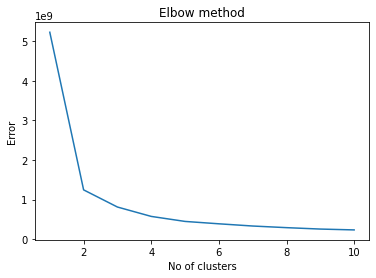

In [0]:
Error =[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i).fit(x)
  kmeans.fit(x)
  Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

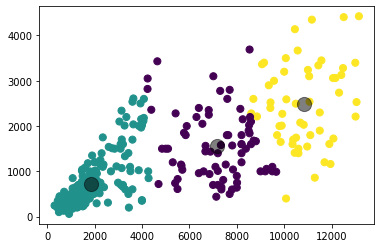

In [0]:
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

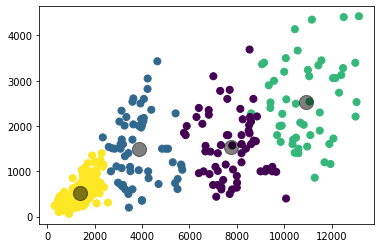

In [0]:
#just seeing what 4 would look like
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans4, s=50, cmap='viridis')

centers = kmeans4.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
# Make a new column in your dfno dataframe called 'clusters', and assign it the variable: y_kmeans3
df_forclusters['clusters'] = y_kmeans3

In [0]:
df_forclusters.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,2
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,2


In [0]:
#Checking to see what cluster to use
bigmountianprofile =  df_forclusters.loc[df_forclusters.Name == 'Whitefish Mountain Resort']
bigmountianprofile

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Whitefish Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


In [0]:
cluster0 = df_forclusters.loc[df_forclusters.clusters == 0]
type(cluster0)

pandas.core.frame.DataFrame

In [0]:
cluster0.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.000000,84.0,300.0,47.000000,47.00000,107.0,0.0,0
6,Bear Mountain,California,8805,1665,0,0.0,0,2,1,2,3,4,12,27.0,14.0,1.5,198.0,198.000000,122.000000,76.0,100.0,57.916957,64.16681,130.0,0.0,0
7,Bear Valley,California,8500,1900,0,0.0,1,1,0,2,4,2,10,67.0,2.0,1.2,1680.0,100.000000,165.000000,52.0,359.0,57.916957,64.16681,151.0,0.0,0
8,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,1,2,8,33.0,6.0,1.0,380.0,200.000000,150.000000,54.0,400.0,49.000000,64.16681,150.0,200.0,0
9,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,5,4,12,67.0,5.0,2.0,862.0,174.873239,115.103943,69.0,350.0,78.000000,78.00000,140.0,0.0,0


In [0]:
#to get the y variables of cluster0
yc = cluster0.AdultWeekend
yc

5      47.00000
6      64.16681
7      64.16681
8      64.16681
9      78.00000
         ...   
325    64.16681
326    42.00000
327    59.00000
328    49.00000
329    49.00000
Name: AdultWeekend, Length: 77, dtype: float64

##Now I will go through OLS again with just cluster 0

In [0]:
xc = cluster0[['summit_elev', 'vertical_drop', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc)
xc = scaler2.transform(xc)
xc = sm.add_constant(xc)
sm_model2rd1 = sm.OLS(yc, xc)
sm_results2rd1 = sm_model2rd1.fit()
sm_results2rd1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     6.454
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.20e-08
Time:                        12:58:29   Log-Likelihood:                -295.28
No. Observations:                  77   AIC:                             626.6
Df Residuals:                      59   BIC:                             668.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.458     42.871      0.000      59.591      65.426
x1             2.3057      1.843      1.251      0.216      -1.383       5.994
x2             1.9005      2.273      0.836      0.406      -2.647       6.448
x3             0.3764      2.283      0.165      0.870      -4.192       4.945
x4         -1.022e-15   7.29e-16     -1.402      0.166   -2.48e-15    4.37e-16
x5             3.9977      1.839      2.174      0.034       0.318       7.677
x6             4.9869      1.951      2.556      0.013       1.083       8.891
x7             4.6352      1.899      2.441      0.018       0.835       8.435
x8             1.9019      1.498      1.270      0.209      -1.095       4.899
x9             3.1053      1.576      1.970      0.054      -0.049       6.260
x10           -0.3834      1.829     -0.210      0.835      -4.043       3.276
x11            5.6757      1.059      5.361      0.000       3.557       7.794
x12            1.9867      3.066      0.648      0.520      -4.149       8.123
x13           -3.4168      1.842     -1.855      0.069      -7.102       0.268
x14           -0.6183      2.093     -0.295      0.769      -4.807       3.571
x15           -4.4578      2.717     -1.641      0.106      -9.894       0.978
x16            2.3263      2.137      1.089      0.281      -1.949       6.602
x17           -3.3166      1.666     -1.991      0.051      -6.650       0.017
x18            1.1679      1.784      0.655      0.515      -2.402       4.738
x19            1.1616      1.932      0.601      0.550      -2.704       5.028
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.097
Skew:                           0.275   Prob(JB):                        0.578
Kurtosis:                       3.200   Cond. No.                     1.64e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
xc_sanstrams = cluster0[['summit_elev', 'vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sanstrams)
xc_sanstrams = scaler2.transform(xc_sanstrams)
xc_sanstrams = sm.add_constant(xc_sanstrams)
sm_model2rd2 = sm.OLS(yc, xc_sanstrams)
sm_results2rd2 = sm_model2rd2.fit()
sm_results2rd2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     6.454
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.20e-08
Time:                        13:02:03   Log-Likelihood:                -295.28
No. Observations:                  77   AIC:                             626.6
Df Residuals:                      59   BIC:                             668.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.458     42.871      0.000      59.591      65.426
x1             2.3057      1.843      1.251      0.216      -1.383       5.994
x2             1.9005      2.273      0.836      0.406      -2.647       6.448
x3          3.372e-15   2.71e-14      0.125      0.901   -5.08e-14    5.75e-14
x4             3.7251      2.863      1.301      0.198      -2.005       9.455
x5             3.8299      7.429      0.516      0.608     -11.035      18.695
x6             3.5517      7.123      0.499      0.620     -10.701      17.804
x7             0.6945      7.571      0.092      0.927     -14.455      15.844
x8             1.6783      8.569      0.196      0.845     -15.469      18.825
x9            -1.3506      6.203     -0.218      0.828     -13.763      11.062
x10            8.9143     19.773      0.451      0.654     -30.651      48.479
x11            1.9867      3.066      0.648      0.520      -4.149       8.123
x12           -3.4168      1.842     -1.855      0.069      -7.102       0.268
x13           -0.6183      2.093     -0.295      0.769      -4.807       3.571
x14           -4.4578      2.717     -1.641      0.106      -9.894       0.978
x15            2.3263      2.137      1.089      0.281      -1.949       6.602
x16           -3.3166      1.666     -1.991      0.051      -6.650       0.017
x17            1.1679      1.784      0.655      0.515      -2.402       4.738
x18            1.1616      1.932      0.601      0.550      -2.704       5.028
==============================================================================
Omnibus:                        1.622   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.097
Skew:                           0.275   Prob(JB):                        0.578
Kurtosis:                       3.200   Cond. No.                     1.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
xc_sanstriple = cluster0[['summit_elev', 'vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sanstriple)
xc_sanstriple = scaler2.transform(xc_sanstriple)
xc_sanstriple = sm.add_constant(xc_sanstriple)
sm_model2rd3 = sm.OLS(yc, xc_sanstriple)
sm_results2rd3 = sm_model2rd3.fit()
sm_results2rd3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     6.972
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.18e-08
Time:                        13:05:04   Log-Likelihood:                -295.29
No. Observations:                  77   AIC:                             624.6
Df Residuals:                      60   BIC:                             664.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.446     43.229      0.000      59.616      65.401
x1             2.3322      1.805      1.292      0.201      -1.279       5.944
x2             1.8701      2.230      0.839      0.405      -2.590       6.330
x3          1.426e-15   3.57e-15      0.400      0.691   -5.71e-15    8.56e-15
x4             3.5264      1.857      1.899      0.062      -0.189       7.242
x5             3.1881      2.477      1.287      0.203      -1.766       8.142
x6             2.9371      2.399      1.224      0.226      -1.861       7.736
x7             0.9189      2.195      0.419      0.677      -3.473       5.311
x8            -1.8787      2.290     -0.820      0.415      -6.460       2.702
x9            10.6832      4.332      2.466      0.017       2.018      19.349
x10            1.9095      2.924      0.653      0.516      -3.939       7.758
x11           -3.4134      1.826     -1.869      0.066      -7.066       0.239
x12           -0.6638      2.017     -0.329      0.743      -4.698       3.371
x13           -4.3892      2.590     -1.695      0.095      -9.570       0.791
x14            2.3147      2.115      1.094      0.278      -1.917       6.546
x15           -3.3105      1.651     -2.006      0.049      -6.612      -0.009
x16            1.1648      1.769      0.658      0.513      -2.374       4.704
x17            1.1904      1.891      0.630      0.531      -2.592       4.972
==============================================================================
Omnibus:                        1.517   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.022
Skew:                           0.268   Prob(JB):                        0.600
Kurtosis:                       3.179   Cond. No.                     9.17e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
xc_sanslongestrun = cluster0[['summit_elev', 'vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sanslongestrun)
xc_sanslongestrun = scaler2.transform(xc_sanslongestrun)
xc_sanslongestrun = sm.add_constant(xc_sanslongestrun)
sm_model2rd4 = sm.OLS(yc, xc_sanslongestrun)
sm_results2rd4 = sm_model2rd4.fit()
sm_results2rd4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     7.540
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           4.36e-09
Time:                        13:07:25   Log-Likelihood:                -295.36
No. Observations:                  77   AIC:                             622.7
Df Residuals:                      61   BIC:                             660.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.435     43.549      0.000      59.639      65.379
x1             2.4093      1.777      1.356      0.180      -1.144       5.963
x2             1.7735      2.194      0.808      0.422      -2.614       6.161
x3          3.179e-15   1.83e-15      1.741      0.087   -4.71e-16    6.83e-15
x4             3.4550      1.831      1.887      0.064      -0.206       7.117
x5             3.1274      2.452      1.276      0.207      -1.775       8.030
x6             3.0341      2.363      1.284      0.204      -1.692       7.760
x7             1.0061      2.163      0.465      0.644      -3.320       5.332
x8            -2.0642      2.204     -0.937      0.353      -6.470       2.342
x9            10.7241      4.299      2.495      0.015       2.129      19.320
x10            1.6545      2.799      0.591      0.557      -3.942       7.251
x11           -3.3573      1.805     -1.860      0.068      -6.966       0.251
x12           -4.3979      2.571     -1.711      0.092      -9.539       0.743
x13            2.2154      2.078      1.066      0.291      -1.940       6.371
x14           -3.4483      1.585     -2.176      0.033      -6.618      -0.279
x15            1.1706      1.756      0.667      0.508      -2.341       4.682
x16            1.2865      1.854      0.694      0.490      -2.421       4.994
==============================================================================
Omnibus:                        1.256   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                0.798
Skew:                           0.234   Prob(JB):                        0.671
Kurtosis:                       3.170   Cond. No.                     2.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
xc_sansdouble = cluster0[['summit_elev', 'vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sansdouble)
xc_sansdouble = scaler2.transform(xc_sansdouble)
xc_sansdouble = sm.add_constant(xc_sansdouble)
sm_model2rd5 = sm.OLS(yc, xc_sansdouble)
sm_results2rd5 = sm_model2rd5.fit()
sm_results2rd5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8.166
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.63e-09
Time:                        13:09:30   Log-Likelihood:                -295.49
No. Observations:                  77   AIC:                             621.0
Df Residuals:                      62   BIC:                             656.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.426     43.827      0.000      59.658      65.360
x1             2.3026      1.751      1.315      0.193      -1.198       5.803
x2             1.8592      2.172      0.856      0.395      -2.483       6.202
x3         -3.284e-15   1.68e-15     -1.951      0.056   -6.65e-15    8.06e-17
x4             3.2365      1.759      1.840      0.070      -0.279       6.752
x5             2.5762      2.132      1.208      0.232      -1.686       6.839
x6             2.4677      2.013      1.226      0.225      -1.555       6.491
x7            -2.3808      2.082     -1.143      0.257      -6.544       1.782
x8            11.9292      3.408      3.500      0.001       5.117      18.742
x9             1.6726      2.781      0.601      0.550      -3.886       7.231
x10           -3.3516      1.793     -1.869      0.066      -6.936       0.233
x11           -4.3429      2.552     -1.702      0.094      -9.444       0.758
x12            2.1185      2.055      1.031      0.307      -1.989       6.226
x13           -3.3398      1.558     -2.144      0.036      -6.454      -0.226
x14            1.1104      1.740      0.638      0.526      -2.368       4.589
x15            1.2547      1.841      0.681      0.498      -2.426       4.935
==============================================================================
Omnibus:                        1.398   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.975
Skew:                           0.269   Prob(JB):                        0.614
Kurtosis:                       3.123   Cond. No.                     3.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
xc_sansruns = cluster0[['summit_elev', 'vertical_drop',
       'fastEight', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sansruns)
xc_sansruns = scaler2.transform(xc_sansruns)
xc_sansruns = sm.add_constant(xc_sansruns)
sm_model2rd6 = sm.OLS(yc, xc_sansruns)
sm_results2rd6 = sm_model2rd6.fit()
sm_results2rd6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     8.857
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           6.21e-10
Time:                        13:14:09   Log-Likelihood:                -295.72
No. Observations:                  77   AIC:                             619.4
Df Residuals:                      63   BIC:                             652.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.419     44.050      0.000      59.673      65.345
x1             2.0132      1.675      1.202      0.234      -1.334       5.360
x2             2.1227      2.117      1.003      0.320      -2.108       6.353
x3          2.676e-16   1.26e-15      0.212      0.833   -2.26e-15    2.79e-15
x4             3.0332      1.717      1.767      0.082      -0.398       6.464
x5             2.5409      2.121      1.198      0.235      -1.697       6.779
x6             2.4007      1.999      1.201      0.234      -1.595       6.396
x7            -2.4149      2.071     -1.166      0.248      -6.554       1.724
x8            12.5370      3.238      3.872      0.000       6.066      19.008
x9            -3.4727      1.773     -1.959      0.055      -7.015       0.070
x10           -3.5053      2.127     -1.648      0.104      -7.757       0.746
x11            2.5388      1.923      1.321      0.191      -1.303       6.381
x12           -3.1445      1.516     -2.074      0.042      -6.174      -0.115
x13            0.9947      1.721      0.578      0.565      -2.444       4.433
x14            0.8968      1.734      0.517      0.607      -2.568       4.361
==============================================================================
Omnibus:                        1.652   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.128
Skew:                           0.280   Prob(JB):                        0.569
Kurtosis:                       3.196   Cond. No.                     2.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.94e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
xc_sansfasteight = cluster0[['summit_elev', 'vertical_drop', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall', 'NightSkiing_ac']]
scaler2.fit(xc_sansfasteight)
xc_sansfasteight = scaler2.transform(xc_sansfasteight)
xc_sansfasteight = sm.add_constant(xc_sansfasteight)
sm_model2rd7 = sm.OLS(yc, xc_sansfasteight)
sm_results2rd7 = sm_model2rd7.fit()
sm_results2rd7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     8.857
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           6.21e-10
Time:                        13:18:01   Log-Likelihood:                -295.72
No. Observations:                  77   AIC:                             619.4
Df Residuals:                      63   BIC:                             652.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.419     44.050      0.000      59.673      65.345
x1             2.0132      1.675      1.202      0.234      -1.334       5.360
x2             2.1227      2.117      1.003      0.320      -2.108       6.353
x3             3.0332      1.717      1.767      0.082      -0.398       6.464
x4             2.5409      2.121      1.198      0.235      -1.697       6.779
x5             2.4007      1.999      1.201      0.234      -1.595       6.396
x6            -2.4149      2.071     -1.166      0.248      -6.554       1.724
x7            12.5370      3.238      3.872      0.000       6.066      19.008
x8            -3.4727      1.773     -1.959      0.055      -7.015       0.070
x9            -3.5053      2.127     -1.648      0.104      -7.757       0.746
x10            2.5388      1.923      1.321      0.191      -1.303       6.381
x11           -3.1445      1.516     -2.074      0.042      -6.174      -0.115
x12            0.9947      1.721      0.578      0.565      -2.444       4.433
x13            0.8968      1.734      0.517      0.607      -2.568       4.361
==============================================================================
Omnibus:                        1.652   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.128
Skew:                           0.280   Prob(JB):                        0.569
Kurtosis:                       3.196   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
xc_sansnightskiing = cluster0[['summit_elev', 'vertical_drop', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen',
       'averageSnowfall']]
scaler2.fit(xc_sansnightskiing)
xc_sansnightskiing = scaler2.transform(xc_sansnightskiing)
xc_sansnightskiing = sm.add_constant(xc_sansnightskiing)
sm_model2rd8 = sm.OLS(yc, xc_sansnightskiing)
sm_results2rd8 = sm_model2rd8.fit()
sm_results2rd8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     9.683
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           2.18e-10
Time:                        13:19:35   Log-Likelihood:                -295.88
No. Observations:                  77   AIC:                             617.8
Df Residuals:                      64   BIC:                             648.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.411     44.305      0.000      59.690      65.327
x1             1.7652      1.596      1.106      0.273      -1.423       4.953
x2             1.9409      2.076      0.935      0.353      -2.206       6.088
x3             2.7812      1.637      1.699      0.094      -0.489       6.052
x4             2.7337      2.076      1.317      0.193      -1.413       6.881
x5             2.1854      1.944      1.124      0.265      -1.699       6.070
x6            -2.5060      2.052     -1.221      0.226      -6.605       1.593
x7            12.7083      3.203      3.968      0.000       6.310      19.106
x8            -3.4033      1.758     -1.936      0.057      -6.914       0.108
x9            -3.1409      1.996     -1.574      0.121      -7.128       0.846
x10            2.5194      1.911      1.318      0.192      -1.299       6.337
x11           -3.0942      1.504     -2.057      0.044      -6.099      -0.090
x12            1.0466      1.708      0.613      0.542      -2.366       4.459
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.678
Skew:                           0.228   Prob(JB):                        0.713
Kurtosis:                       3.059   Cond. No.                         5.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
xc_sansaveragesnowfall = cluster0[['summit_elev', 'vertical_drop', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']]
scaler2.fit(xc_sansaveragesnowfall)
xc_sansaveragesnowfall = scaler2.transform(xc_sansaveragesnowfall)
xc_sansaveragesnowfall = sm.add_constant(xc_sansaveragesnowfall)
sm_model2rd9 = sm.OLS(yc, xc_sansaveragesnowfall)
sm_results2rd9 = sm_model2rd9.fit()
sm_results2rd9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     10.63
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           7.64e-11
Time:                        13:21:11   Log-Likelihood:                -296.11
No. Observations:                  77   AIC:                             616.2
Df Residuals:                      65   BIC:                             644.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.404     44.519      0.000      59.705      65.313
x1             1.8869      1.576      1.197      0.235      -1.260       5.034
x2             1.9923      2.064      0.965      0.338      -2.130       6.114
x3             2.8310      1.627      1.740      0.087      -0.419       6.081
x4             2.9599      2.033      1.456      0.150      -1.100       7.020
x5             2.5962      1.816      1.429      0.158      -1.031       6.224
x6            -2.6719      2.024     -1.320      0.191      -6.714       1.370
x7            12.5091      3.171      3.945      0.000       6.177      18.842
x8            -3.4248      1.749     -1.958      0.054      -6.917       0.068
x9            -2.8050      1.910     -1.469      0.147      -6.619       1.009
x10            2.3665      1.886      1.255      0.214      -1.399       6.133
x11           -2.9010      1.464     -1.982      0.052      -5.824       0.022
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.761
Skew:                           0.235   Prob(JB):                        0.684
Kurtosis:                       3.129   Cond. No.                         5.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
xc_sansverticaldrop = cluster0[['summit_elev', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']]
scaler2.fit(xc_sansverticaldrop)
xc_sansverticaldrop = scaler2.transform(xc_sansverticaldrop)
xc_sansverticaldrop = sm.add_constant(xc_sansverticaldrop)
sm_model2rd10 = sm.OLS(yc, xc_sansverticaldrop)
sm_results2rd10 = sm_model2rd10.fit()
sm_results2rd10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           3.31e-11
Time:                        13:24:14   Log-Likelihood:                -296.65
No. Observations:                  77   AIC:                             615.3
Df Residuals:                      66   BIC:                             641.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.403     44.542      0.000      59.707      65.311
x1             1.8003      1.572      1.145      0.256      -1.339       4.940
x2             2.9459      1.622      1.816      0.074      -0.292       6.184
x3             3.2201      2.014      1.599      0.115      -0.801       7.241
x4             2.6582      1.814      1.465      0.148      -0.964       6.280
x5            -3.2326      1.938     -1.668      0.100      -7.102       0.637
x6            13.0611      3.117      4.190      0.000       6.837      19.285
x7            -3.1624      1.727     -1.832      0.072      -6.610       0.285
x8            -1.9360      1.684     -1.150      0.254      -5.297       1.425
x9             2.4410      1.883      1.296      0.199      -1.319       6.201
x10           -2.9968      1.459     -2.053      0.044      -5.911      -0.083
==============================================================================
Omnibus:                        0.573   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.416
Skew:                           0.180   Prob(JB):                        0.812
Kurtosis:                       2.976   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#This is where the r2 started to decrease
xc_sanssummitelev = cluster0[['fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']]
scaler2.fit(xc_sanssummitelev)
xc_sanssummitelev = scaler2.transform(xc_sanssummitelev)
xc_sanssummitelev = sm.add_constant(xc_sanssummitelev)
sm_model2rd11 = sm.OLS(yc, xc_sanssummitelev)
sm_results2rd11 = sm_model2rd11.fit()
sm_results2rd11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdultWeekend   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     12.70
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           1.63e-11
Time:                        13:26:56   Log-Likelihood:                -297.41
No. Observations:                  77   AIC:                             614.8
Df Residuals:                      67   BIC:                             638.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5088      1.407     44.439      0.000      59.701      65.316
x1             2.7734      1.619      1.713      0.091      -0.457       6.004
x2             3.4808      2.006      1.735      0.087      -0.523       7.484
x3             2.1457      1.762      1.218      0.228      -1.372       5.663
x4            -3.2110      1.942     -1.653      0.103      -7.088       0.666
x5            12.6074      3.099      4.068      0.000       6.422      18.793
x6            -2.9767      1.723     -1.728      0.089      -6.416       0.462
x7            -1.8897      1.687     -1.120      0.267      -5.257       1.478
x8             2.3257      1.885      1.234      0.222      -1.436       6.088
x9            -2.8044      1.453     -1.930      0.058      -5.705       0.096
==============================================================================
Omnibus:                        1.344   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.851
Skew:                           0.238   Prob(JB):                        0.653
Kurtosis:                       3.196   Cond. No.                         4.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
xc_model2 = cluster0[['summit_elev', 'fastSixes', 'fastQuads', 'quad',
       'surface', 'total_chairs', 'TerrainParks',
       'SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']]
scaler2.fit(xc_model2)
xc_model2 = scaler2.transform(xc_model2)
xc_train2, xc_test2, yc_train2, yc_test2 = train_test_split(xc_model2, yc, test_size=0.25, random_state=1)
reg = linear_model.LinearRegression()
reg.fit(xc_train2, yc_train2)
yc_pred2 = reg.predict(xc_test2)


In [93]:
explained_variance_score(yc_test2, yc_pred2)

0.5572206579778187

In [94]:
reg.intercept_

63.54194221082809

In [95]:
rmse_model2 = sqrt(mean_squared_error(yc_test2, yc_pred2))
rmse_model2

13.271346688901865

#This seems to be the best predictive model. It has the best explained variance score and a better rmse.